In [3]:
# Import Tensorflow, Keras, and IMDB movie set
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000);

print_train_test_data = True;

if(print_train_test_data):
  print("Training Data");
  print(train_data[0]);
  print("Training Labels");
  print(train_labels[0])
  print("Testing Data");
  print(test_data[0])
  print("Testing Labels");
  print(test_labels[0])

Training Data
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Training Labels
1
Testing Data
[1, 591, 202, 1

In [3]:
# Function for decoding a review
def decodeReview():
  word_index = imdb.get_word_index()
  reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
  decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
  return decoded_review

In [6]:
import numpy as np

'''
Every Row has word indexes e.g. [2, 10, 20, 20] in data;
these integers are the indexes of the unique words
getting the words on this index, and then joining them with a space
creates a sentence.
In order to make it work with deep learning, we have to perform
Multi-hot encode, in this procedure we will create a an array of 0s
of (the number of total unique words) in this case 10,000, and make
only the indexes in data would be 1s.
E.g only index: 2, 10, 20, would be marked one otherwise 0
'''

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension));
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

# Reviews
x_train = vectorize_sequences(train_data);
x_test = vectorize_sequences(test_data);

# Labels
y_train = np.asarray(train_labels).astype("float32");
y_test = np.asarray(test_labels).astype("float32");


[0. 1. 1. ... 0. 0. 0.]


In [5]:
# Create the model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

2023-08-16 22:52:26.996645: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-08-16 22:52:26.996713: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-16 22:52:26.996723: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-16 22:52:27.000015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-16 22:52:27.003526: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# Creating validation Data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
# Training the Model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20


2023-08-16 22:52:30.025226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 4s 54ms/step - loss: 0.5519 - accuracy: 0.7631 - val_loss: 0.4358 - val_accuracy: 0.8537


2023-08-16 22:52:33.435068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3483 - accuracy: 0.8917 - val_loss: 0.3239 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2509 - accuracy: 0.9205 - val_loss: 0.2839 - val_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1989 - accuracy: 0.9353 - val_loss: 0.2985 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1601 - accuracy: 0.9485 - val_loss: 0.2894 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1333 - accuracy: 0.9575 - val_loss: 0.3179 - val_accuracy: 0.8784
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1130 - accuracy: 0.9662 - val_loss: 0.2992 - val_accuracy: 0.8827
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0961 - accuracy: 0.9711 - val_loss: 0.3167 - val_accuracy: 0.8860
Epoch 9/20
30

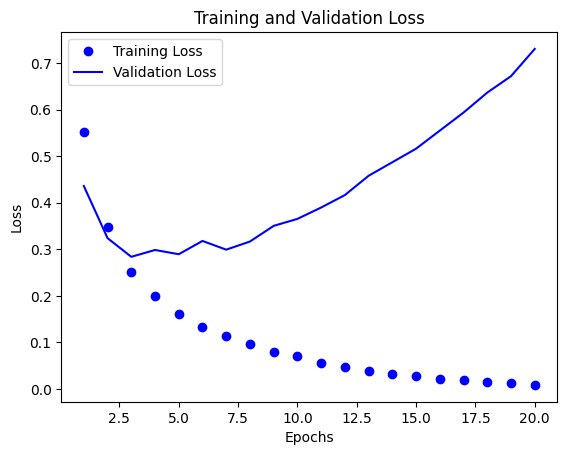

In [8]:
# Plot the training and validation loss
import matplotlib.pyplot as plt

# Extract training loss, validation loss, and number of epochs from history object
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1);

plt.plot(epochs, loss_values, "bo", label="Training Loss");
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

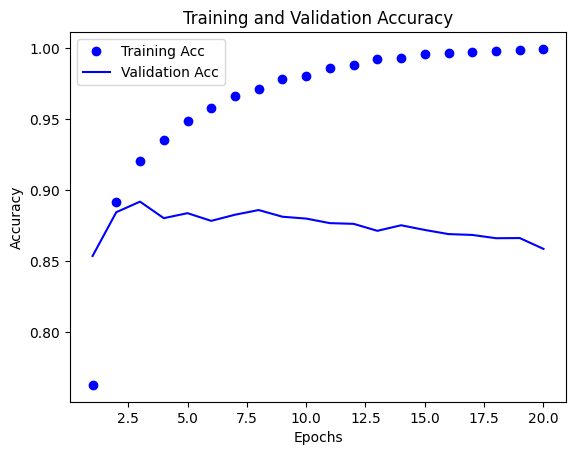

In [9]:
# Plot the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training Acc")
plt.plot(epochs, val_acc, "b", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
# Creating a better, more accurate model
'''
After plotting the validation and training accuracy
we see that the model starts overfitting after 4th epoch
hence the accuracy of validation peaks at 4the epoch and then degrades.
Now since we know that we must train our model only till 4th epoch
for best results.
'''

better_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

better_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

better_model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512
)

results = model.evaluate(x_test, y_test);

print("Resutls: ", results);

Epoch 1/4


2023-08-16 22:52:46.064262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 12ms/step - loss: 0.4720 - accuracy: 0.8078
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2736 - accuracy: 0.9067
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2069 - accuracy: 0.9273
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.8033 - accuracy: 0.8445
Resutls:  [0.8032971620559692, 0.8445200324058533]
